## Implement the gradient descent variants (Batch/Mini-Batch/Stochastic)

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0, 20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
y = -2 * X + 1
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

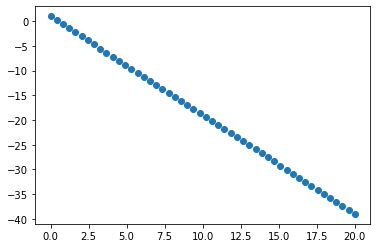

In [4]:
plt.scatter(X,y)
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:
def GD(X, y, alpha, epochs):
    
    loss = []
    thetas_0 = []
    thetas_1 = []
    theta_0 = 0
    theta_1 = 0
    m = float(len(X))
    for i in range(epochs):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        h = theta_0 + theta_1 * X
        j = (1/(2 * m)) * sum((h - y)**2) 
        loss.append(j)
        gradient_theta_0 = (1 / m) * sum(h - y)
        gradient_theta_1 = (1 / m) * sum((h - y) * X)
        theta_0 = theta_0 - alpha * gradient_theta_0 
        theta_1 = theta_1 - alpha * gradient_theta_1  
        
    return thetas_0, thetas_1, loss, thetas_0[-1], thetas_1[-1]

#### Try your function with any input parameterss of your choice.

In [6]:
thetas_0, thetas_1, loss, thetas0_opt, theta1_opt = GD(X, y, 0.001, 1000)

In [7]:
loss[-1]

0.10075038169390013

In [8]:
theta1_opt

-1.9342096107823894

In [9]:
thetas0_opt

0.11552903106807226

In [10]:
h = thetas0_opt + theta1_opt * X
h

array([  0.11552903,  -0.67394428,  -1.46341759,  -2.2528909 ,
        -3.04236421,  -3.83183752,  -4.62131083,  -5.41078414,
        -6.20025745,  -6.98973076,  -7.77920407,  -8.56867738,
        -9.3581507 , -10.14762401, -10.93709732, -11.72657063,
       -12.51604394, -13.30551725, -14.09499056, -14.88446387,
       -15.67393718, -16.46341049, -17.2528838 , -18.04235711,
       -18.83183042, -19.62130373, -20.41077704, -21.20025035,
       -21.98972366, -22.77919697, -23.56867028, -24.3581436 ,
       -25.14761691, -25.93709022, -26.72656353, -27.51603684,
       -28.30551015, -29.09498346, -29.88445677, -30.67393008,
       -31.46340339, -32.2528767 , -33.04235001, -33.83182332,
       -34.62129663, -35.41076994, -36.20024325, -36.98971656,
       -37.77918987, -38.56866318])

#### Calculate r2 score

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y, h)

0.9985480092049996

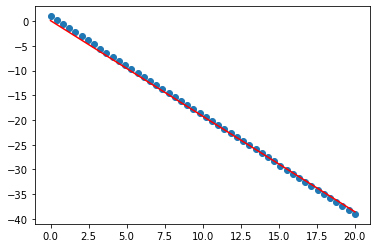

In [13]:
plt.scatter(X,y)
plt.plot(X, h, color='red')
plt.show()

#### Plot loss vs. epochs

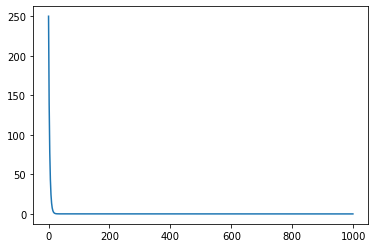

In [14]:
plt.plot(range(1000), loss)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

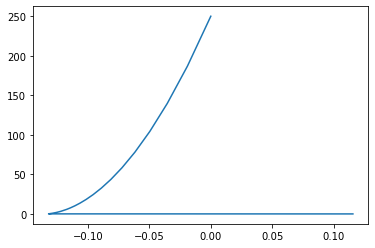

In [15]:
plt.plot(thetas_0, loss)
plt.show()

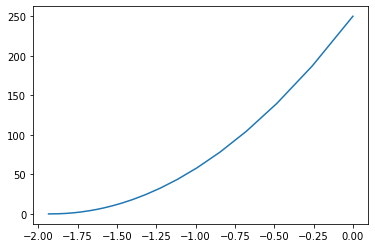

In [16]:
plt.plot(thetas_1, loss)
plt.show()

#### Plot all regression lines till converge

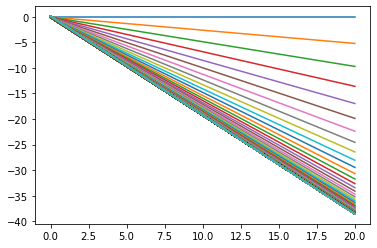

In [17]:
for i in range(len(thetas_0)):
    h = thetas_0[i] + thetas_1[i] * X
    plt.plot(X, h)
plt.show()

#### Plot the best regression line

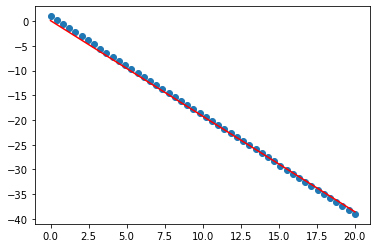

In [18]:
h = thetas0_opt + theta1_opt * X

plt.scatter(X,y)
plt.plot(X, h, color='red')
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [19]:
thetas_0, thetas_1, loss, thetas0_opt, theta1_opt = GD(X, y, 0.05, 100)

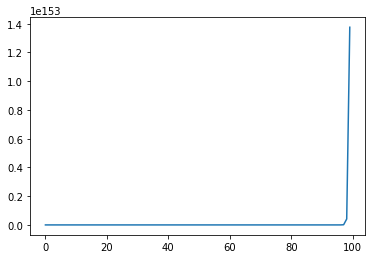

In [20]:
plt.plot(range(100), loss)
plt.show()

In [21]:
thetas_0, thetas_1, loss, thetas0_opt, theta1_opt = GD(X, y, 0.01, 100)

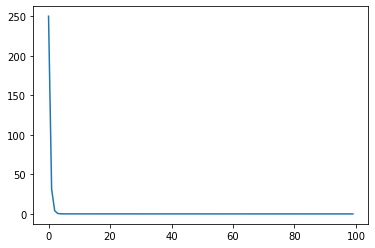

In [22]:
plt.plot(range(100), loss)
plt.show()

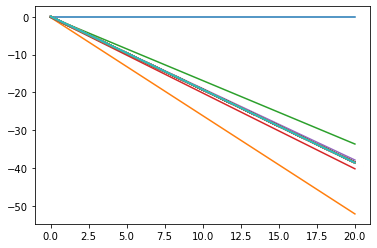

In [23]:
for i in range(len(thetas_0)):
    h = thetas_0[i] + thetas_1[i] * X
    plt.plot(X, h)
plt.show()

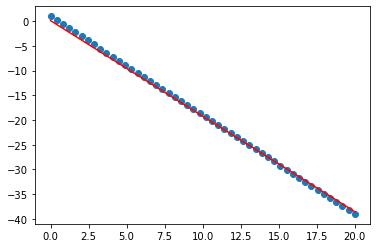

In [24]:
h = thetas0_opt + theta1_opt * X

plt.scatter(X,y)
plt.plot(X, h, color='red')
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

### Without shuffling the data

In [25]:
epochs = 50
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
X_batches = np.split(X, 5)
y_batches = np.split(y, 5)

for i in range(epochs):
    for bx, by in zip(X_batches, y_batches):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        h = theta_0 + theta_1 * bx
        j = (1/(2 * len(bx))) * sum((h - by)**2) 
        loss.append(j)
        gradient_theta_0 = (1 / float(len(bx))) * sum(h - by)
        gradient_theta_1 = (1 / float(len(bx))) * sum((h - by) * bx)
        theta_0 = theta_0 - alpha * gradient_theta_0 
        theta_1 = theta_1 - alpha * gradient_theta_1  

In [26]:
print(loss[-1])
print(thetas_0[-1])
print(thetas_1[-1])

0.07773513459043187
-0.07672627925156258
-1.9196398369968373


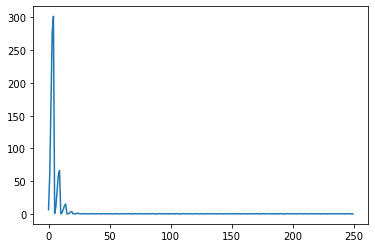

In [27]:
plt.plot(range(250), loss)
plt.show()

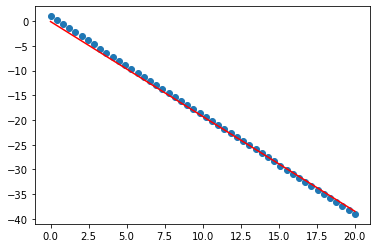

In [28]:
h = thetas_0[-1] + thetas_1[-1] * X

plt.scatter(X,y)
plt.plot(X, h, color='red')
plt.show()

In [29]:
from sklearn.metrics import r2_score
r2_score(y, h)

0.9978480233113257

### With data shuffling

In [30]:
epochs = 50
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
np.random.seed(555)  
np.random.shuffle(X)  
np.random.seed(555)  
np.random.shuffle(y)
X_batches = np.split(X, 5)
y_batches = np.split(y, 5)

for i in range(epochs):
    for bx, by in zip(X_batches, y_batches):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        h = theta_0 + theta_1 * bx
        j = (1/(2 * len(bx))) * sum((h - by)**2) 
        loss.append(j)
        gradient_theta_0 = (1 / float(len(bx))) * sum(h - by)
        gradient_theta_1 = (1 / float(len(bx))) * sum((h - by) * bx)
        theta_0 = theta_0 - alpha * gradient_theta_0 
        theta_1 = theta_1 - alpha * gradient_theta_1  

In [31]:
print(loss[-1])
print(thetas_0[-1])
print(thetas_1[-1])

0.08589382208517624
-0.07424076406594743
-1.9208611951097088


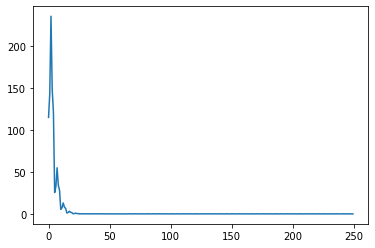

In [32]:
plt.plot(range(250), loss)
plt.show()

In [33]:
h = thetas_0[-1] + thetas_1[-1] * X

In [34]:
from sklearn.metrics import r2_score
r2_score(y, h)

0.9978577510275929

In [35]:
X = np.linspace(0, 20)
y = -2 * X + 1

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and repeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

### Without shuffling the data

In [36]:
epochs = 10
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
m = float(len(X))
for i in range(epochs):
    for sample_x, sample_y in zip(X, y):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        h = theta_0 + theta_1 * sample_x
        j = ((h - sample_y)**2) 
        loss.append(j)
        gradient_theta_0 = (h - sample_y)
        gradient_theta_1 = ((h - sample_y) * sample_x)
        theta_0 = theta_0 - alpha * gradient_theta_0 
        theta_1 = theta_1 - alpha * gradient_theta_1      

In [37]:
print(loss[-1])
print(thetas_0[-1])
print(thetas_1[-1])

0.005416891573115586
-0.11707923233389637
-1.9404660616262062


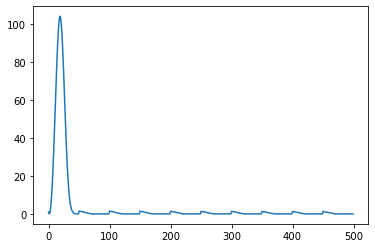

In [38]:
plt.plot(range(500), loss)
plt.show()

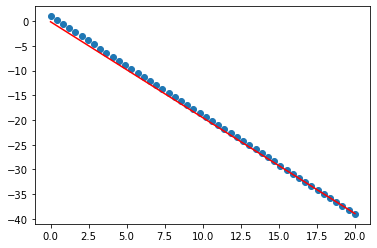

In [39]:
h = thetas_0[-1] + thetas_1[-1] * X

plt.scatter(X,y)
plt.plot(X, h, color='red')
plt.show()

In [40]:
from sklearn.metrics import r2_score
r2_score(y, h)

0.9971523965143919

### With shuffling the data

In [41]:
epochs = 10
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
m = float(len(X))
np.random.seed(555)  
np.random.shuffle(X)  
np.random.seed(555)  
np.random.shuffle(y)  
for i in range(epochs):
    for sample_x, sample_y in zip(X, y):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        h = theta_0 + theta_1 * sample_x
        j = ((h - sample_y)**2) 
        loss.append(j)
        gradient_theta_0 = (h - sample_y)
        gradient_theta_1 = ((h - sample_y) * sample_x)
        theta_0 = theta_0 - alpha * gradient_theta_0 
        theta_1 = theta_1 - alpha * gradient_theta_1      

In [42]:
print(loss[-1])
print(thetas_0[-1])
print(thetas_1[-1])

0.1227440178446473
-0.03348812015163816
-1.935627220891865


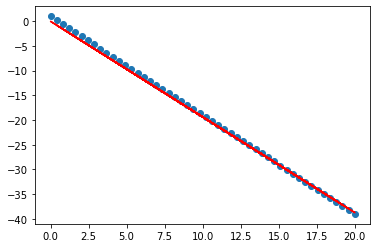

In [43]:
h = thetas_0[-1] + thetas_1[-1] * X

plt.scatter(X,y)
plt.plot(X, h, color='red')
plt.show()

In [44]:
from sklearn.metrics import r2_score
r2_score(y, h)

0.997869368299278